Other example of Jupyter notebook using GRASS GIS can be found [HERE](https://grasswiki.osgeo.org/wiki/GRASS_GIS_Jupyter_notebooks)

# Configuration of the working environment

## Import libraries and define GRASS python path

**Importing Python libraries and modules**

In [2]:
# Import base Python libraries 
import os
import sys
import shutil
# Import IPython packages for display in the notebook
from IPython.display import Image

**Add folder with SCR provided belong to this notebook**

In [3]:
# Add local module to the path
src = os.path.abspath('../SRC')
if src not in sys.path:
    sys.path.append(src)

**Setup environment variables**

Please edit the file in `../SRC/config.py`, containing the configuration parameters, according to your own computer setup. The following cell is used to run this file.



In [4]:
run ../SRC/config_linux.py

In [5]:
# Import functions that setup the environmental variables
import environ_variables_linux as envi

In [6]:
# Set environmental variables
envi.setup_environmental_variables() 
# Display current environment variables of your computer
envi.print_environmental_variables()

PATH	= /.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/lib/grass78/bin:/usr/lib/grass78/script:/usr/lib/grass78/lib 	
HOSTNAME	= 187a6364f41e 	
DISPLAY	= unix:1 	
LANG	= C.UTF-8 	
LC_ALL	= C.UTF-8 	
JUPYTER_ENABLE_LAB	= yes 	
TINI_VERSION	= v0.6.0 	
HOME	= /home/demo_user 	
JPY_PARENT_PID	= 7 	
TERM	= xterm-color 	
CLICOLOR	= 1 	
PAGER	= cat 	
GIT_PAGER	= cat 	
MPLBACKEND	= module://ipykernel.pylab.backend_inline 	
PYTHONPATH	= :/usr/lib/grass78/etc/python:/usr/lib/grass78/etc/python/grass:/usr/lib/grass78/etc/python/grass/script 	
LD_LIBRARY_PATH	= :/usr/lib/grass78/lib 	
GISBASE	= /usr/lib/grass78 	
PYTHONLIB	= /usr/bin/python3 	
GIS_LOCK	= $$ 	
GISRC	= /home/demo_user/.grass7/rc 	


**Importing GRASS GIS libraries and modules**

In [7]:
#Import libraries needed to launch GRASS GIS in the Jupyter Notebook
import grass.script.setup as gsetup
#Import libraries needed to call GRASS using Python
import grass.script as gscript

**Importing other functions**

In [8]:
# Import function that checks existence of GRASS GIS database folder and creates it if needed
from grass_database import check_gisdb, check_location, check_mapset, working_mapset, launch_mapset
# Import functions for processing time information
from processing_time import start_processing, print_processing_time
# Import function that checks and creates folder
from mkdir import check_create_dir
# Import function that checks if GRASS GIS add-on is installed and install it if needed
from gextension import check_install_addon

**Create output directory if not exists**

In [9]:
#Check and create output data directory if needed
outputdir = '/home/demo_user/output_container/basic_display'
check_create_dir(outputdir)

The folder '/home/demo_user/output_container/basic_display' has been created


**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

## Setup GRASS GIS session and specific environment variables

In [10]:
# Create a GRASS GIS session.
rcfile = gsetup.init(config_parameters['GISBASE'], "../../GRASSDATA", "nc_spm_08_grass7", "user1")

# We want functions to raise exceptions and see standard output of the modules in the notebook.
gscript.set_raise_on_error(True)
gscript.set_capture_stderr(True)
# Simply overwrite existing maps like we overwrite Python variable values.
os.environ['GRASS_OVERWRITE'] = '1'
# Enable map rendering in a notebook.
os.environ['GRASS_FONT'] = 'sans'
# Set display modules to render into a file (named map.png by default)
os.environ['GRASS_RENDER_IMMEDIATE'] = 'cairo'
os.environ['GRASS_RENDER_FILE_READ'] = 'TRUE'
os.environ['GRASS_LEGEND_FILE'] = 'legend.txt'

# Example of map display

This example comes from wenzeslaus : https://github.com/wenzeslaus/try-grass-in-jupyter/blob/master/notebook.ipynb

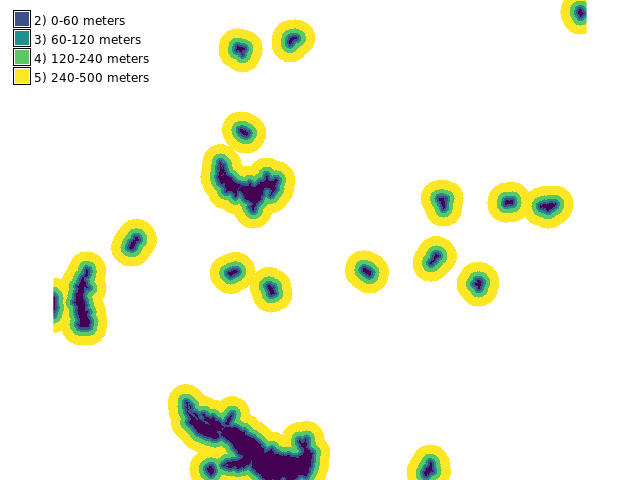

In [11]:
# Define computational region
gscript.parse_command('g.region', raster="lakes", flags='pg')
# Create a buffer arround lakes
gscript.run_command('r.buffer', input="lakes", output="lakes_buff", distances=[60, 120, 240, 500])
# Erase any display instance
gscript.run_command('d.erase')
# Add the buffer layer to the display
gscript.run_command('d.rast', map="lakes_buff")
# Add the legend to the display
gscript.run_command('d.legend', raster="lakes_buff", range=(2, 5), at=(80, 100, 2, 10))
# Copy map to another location
shutil.copy("map.png",os.path.join(outputdir, "map_lakes.png"))
# Display
Image(filename=os.path.join(outputdir, "map_lakes.png"),width=800, height=400)

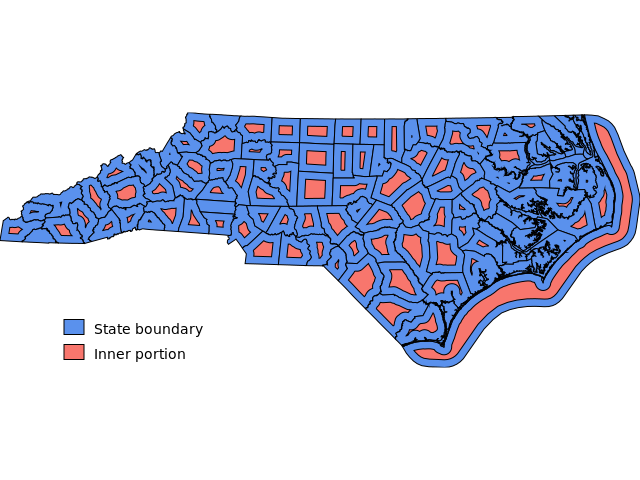

In [15]:
gscript.run_command('v.buffer', input="boundary_county", output="buffer", distance=-10000)
gscript.run_command('g.region', vector="boundary_county")
gscript.run_command('d.erase')  # erase the display before drawing again
!rm -f $GRASS_LEGEND_FILE  # and remove the legend file
gscript.run_command('d.vect', map="boundary_county", fill_color="#5A91ED", legend_label="State boundary")
gscript.run_command('d.vect', map="buffer", fill_color="#F8766D", legend_label="Inner portion")
gscript.run_command('d.legend.vect', at=(10, 35))
shutil.copy("map.png",os.path.join(outputdir, "map_boundary.png"))
Image(filename=os.path.join(outputdir, "map_boundary.png"),width=800, height=400)

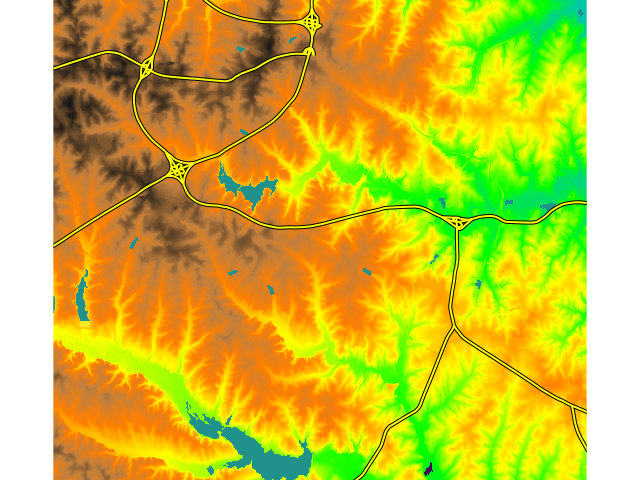

In [18]:
gscript.run_command('g.region', raster='elevation')
gscript.run_command('d.erase')
gscript.run_command('d.rast', map='elevation')
gscript.run_command('d.rast', map='lakes')
gscript.run_command('d.vect', map='roadsmajor', width='4')
gscript.run_command('d.vect', map='roadsmajor', width='2', color='yellow')
shutil.copy("map.png",os.path.join(outputdir, "map_elevation.png"))
Image(filename=os.path.join(outputdir, "map_elevation.png"),width=800, height=400)